# Sprint 8. Algoritmos de aprendizaje NO supervisado: Agrupación

## Tarea M8 T01

### Ejercicio 1: Descarga el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Cargamos los datos

df = pd.read_csv("C:/Users/acbon/Desktop/Data Science/datasets/Publicacions Facebook Thailandia.csv")
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

El dataset consta de 7050 entradas y 16 columnas, abarcando datos de interacción de publicaciones en redes sociales, como se deduce de columnas como num_reactions, num_comments, entre otras. Mientras que las columnas de texto (status_id, status_type, status_published) y las numéricas (num_likes, num_loves, etc.) están completas sin valores nulos, cuatro columnas (Column1 a Column4) están totalmente vacías, conteniendo únicamente valores nulos. El dataset ocupa alrededor de 881.4 KB de memoria. Su contenido sugiere una utilidad potencial para análisis de redes sociales, aunque se requiere limpieza previa para eliminar las columnas vacías y optimizar su uso. 

In [5]:
#Revisamos los calores únicos de los atributos
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

In [6]:
# Comprobamos si hay campos con valor núlo
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

#### Limpieza de los datos

Limpiaremos las columnas vacias y también eliminaremos status_id  porque no nos aporta información útil

In [7]:
# Verificamos los nulos y los eliminamos
df = df.dropna(axis=1, how='all')

# Eliminamos la columna status_id
df = df.drop(['status_id'], axis=1)

# Mostramos las primeras filas del dataframe limpio para verificar
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


#### Conversión y Escalado de los datos.

Antes de seguir con el modelado de los datos y dado a que la sensibilidad a la escala de las características puede influir en el rendimiento del K-Means. Es importante normalizar o estandarizar las características antes de aplicar el algoritmo, ademas de que este modelo no funciona con variables categóricas

De esta manera vamos a convertir las columna 'status_type'  en dummies por medio de pd.get_dummies de Pandas para aplicar lo que comúnmente se conoce como codificación one-hot, luego convertiremos 'status_published' que es una columna de fechas y horas en un formato numérico y finalmente escalaremos los datos con StandardScaler.

In [8]:
# Convertir la columna 'status_type' a dummies
df_encoded = pd.get_dummies(df, columns=['status_type'])

# Mostrar las primeras filas del DataFrame resultante para verificar
df_encoded.head()


,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0,0,0,1
1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0,1,0,0
2,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0,0,0,1
3,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,0,1,0,0
4,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,0,1,0,0


In [9]:
# Trasnformar la columna 'status_published' en númerica

df_encoded['status_published'] = pd.to_datetime(df_encoded['status_published'])
df_encoded['status_published'] = (df_encoded['status_published'] - df_encoded['status_published'].min()) / pd.Timedelta(seconds=1)
df_encoded.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,182056140.0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,182030040.0,150,0,0,150,0,0,0,0,0,0,1,0,0
2,181970760.0,227,236,57,204,21,1,1,0,0,0,0,0,1
3,181957080.0,111,0,0,111,0,0,0,0,0,0,1,0,0
4,181701060.0,213,0,0,204,9,0,0,0,0,0,1,0,0


#### Visualización de los datos

Vamos a comporbar las correlaciones de las varibles númericas por medio de un mapa de calor. También por medio de una combinación de gráficos de caja e histogramas con estimación de densidad, analizaremos la distribución y la presencia de valores atípicos en cada característica numérica del conjunto de datos.

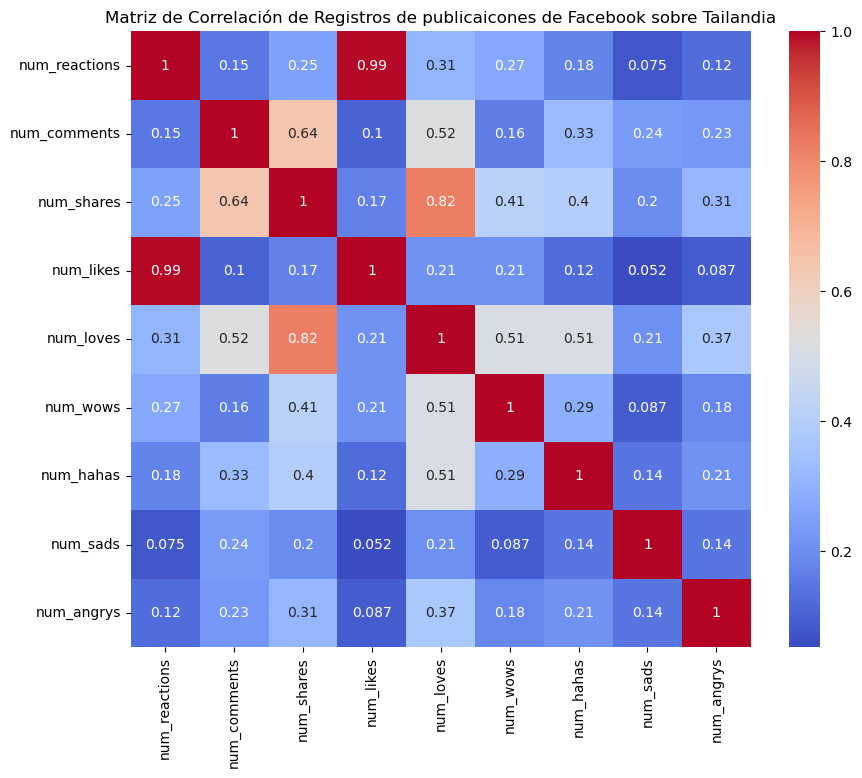

In [10]:
# Mapa de calor de  la Matriz correlación
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación de Registros de publicaicones de Facebook sobre Tailandia')
plt.show()


Esta matriz de correlación visualiza las relaciones entre diferentes tipos de interacciones en publicaciones de Facebook relacionadas con Tailandia. Aquí hay algunos puntos clave que se pueden observar:

* Alta Correlación entre Likes y Reacciones: Existe una correlación casi perfecta (0.99) entre el número de 'likes' y el número total de reacciones, lo que indica que los 'likes' constituyen la mayor parte de las reacciones. Esto es comprensible, ya que los 'likes' son la forma más común de reacción en Facebook.

* Comentarios y Compartidos: Hay una correlación relativamente alta (0.64) entre los comentarios y los compartidos, sugiriendo que las publicaciones que invitan a la discusión también tienden a ser compartidas con frecuencia.

* Amor, Sorpresa y Diversión: Las reacciones de 'amor' (loves), 'sorpresa' (wows) y 'diversión' (hahas) tienen correlaciones moderadas entre sí (alrededor de 0.51 a 0.82), lo que podría indicar que las publicaciones que evocan una de estas emociones también pueden evocar las otras.

* Bajas Correlaciones de Tristeza y Enojo: Las reacciones 'tristes' (sads) y 'enojadas' (angrys) tienen generalmente bajas correlaciones con otras interacciones, lo que podría significar que son menos comunes o que las publicaciones que las generan son específicas y no generan otras interacciones.

* Potencial Influencia de Outliers: Las correlaciones bajas en general fuera de 'likes' y 'reacciones' podrían sugerir que hay outliers o que las interacciones son bastante específicas para cada publicación.

<Figure size 800x500 with 0 Axes>

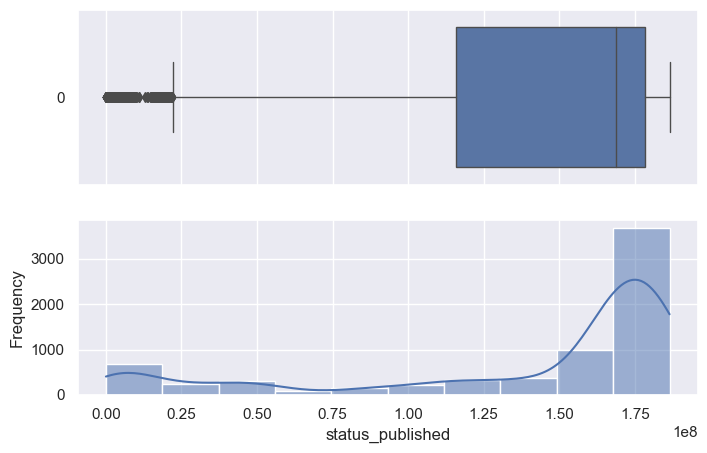

<Figure size 800x500 with 0 Axes>

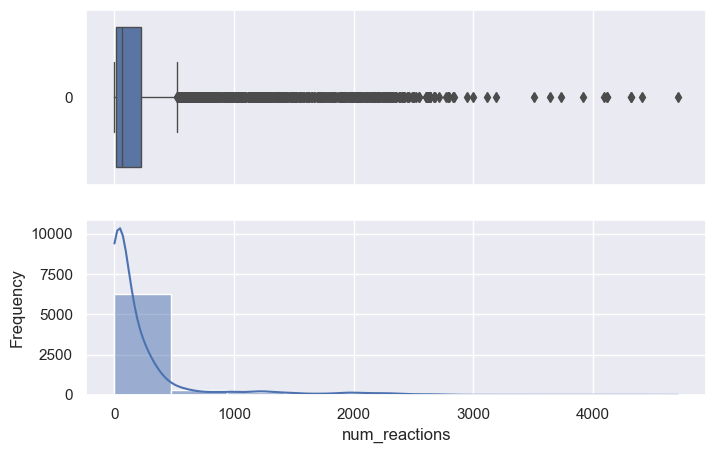

<Figure size 800x500 with 0 Axes>

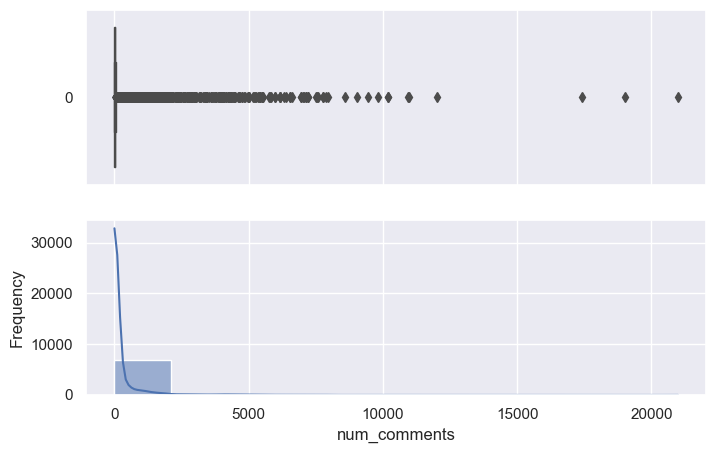

<Figure size 800x500 with 0 Axes>

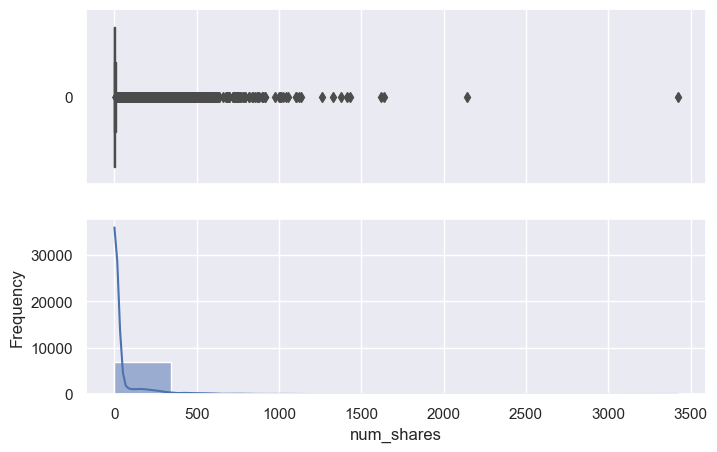

<Figure size 800x500 with 0 Axes>

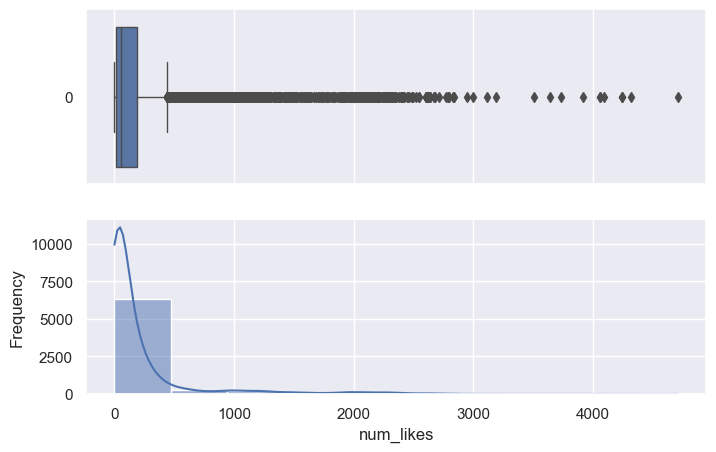

<Figure size 800x500 with 0 Axes>

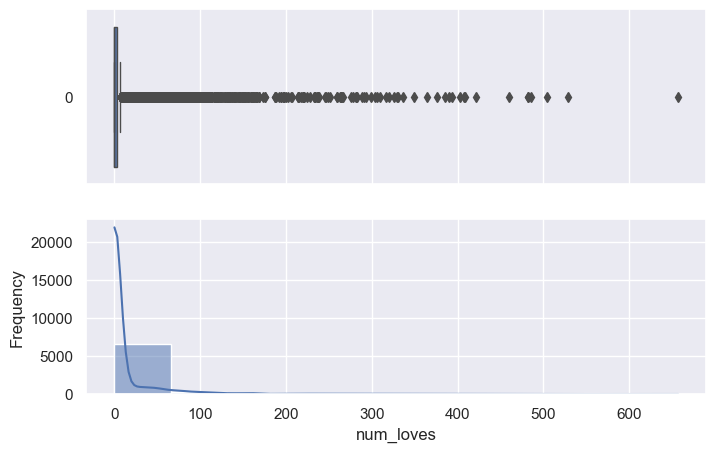

<Figure size 800x500 with 0 Axes>

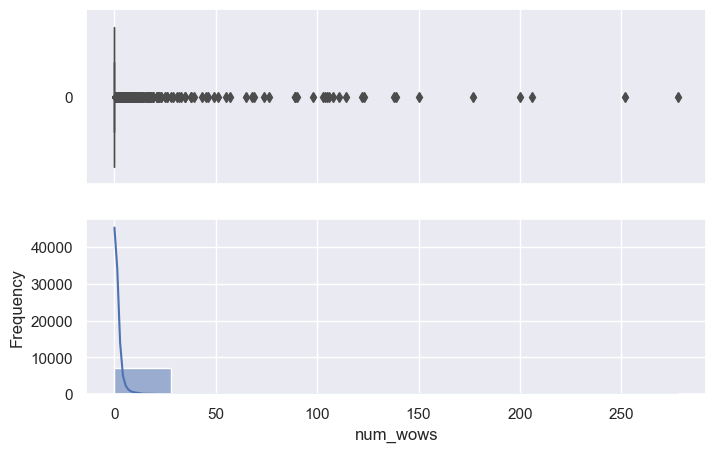

<Figure size 800x500 with 0 Axes>

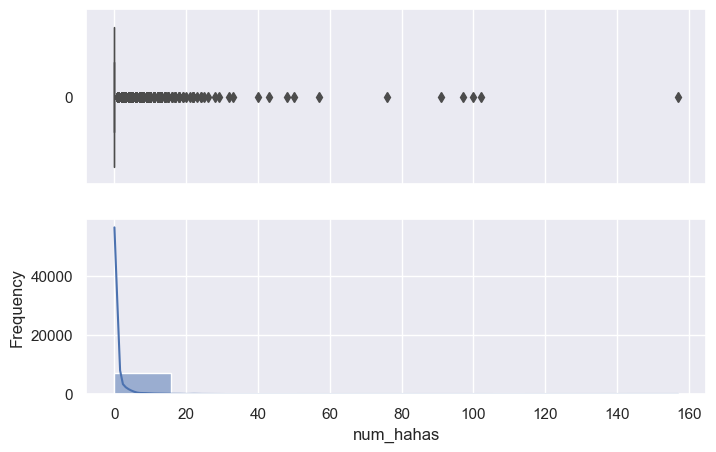

<Figure size 800x500 with 0 Axes>

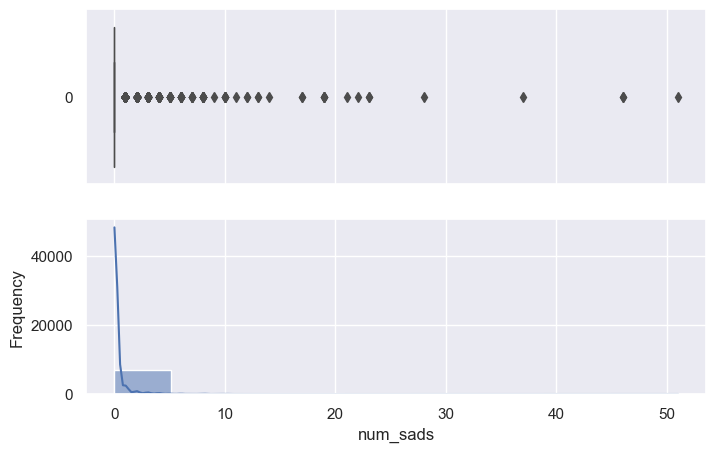

<Figure size 800x500 with 0 Axes>

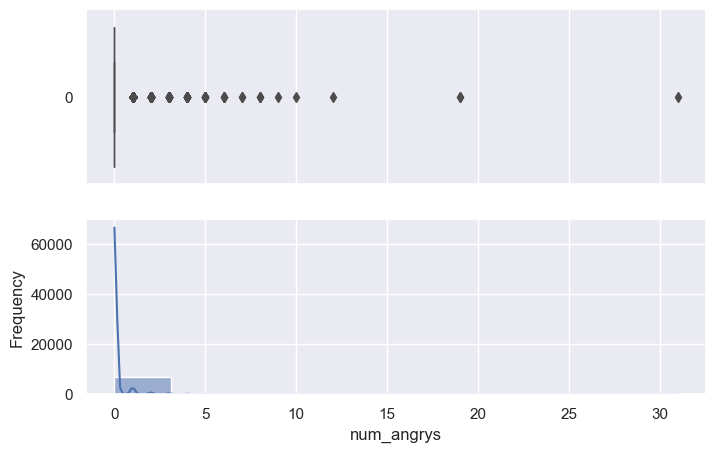

In [12]:
# Boxplots e histogramas de las variables númericas


for i in df_encoded.select_dtypes(include=['float','int']):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_encoded[i],  ax=ax_box , orient = 'h', linewidth= 1.0)
    sns.histplot(df_encoded[i], ax=ax_hist , bins = 10,kde=True)


En general, todos los histogramas muestran un sesgo a la derecha, lo que indica que la mayoría de las publicaciones tienen un número bajo a moderado de interacciones, con algunos valores extremadamente altos que se destacan como valores atípicos. Estos valores atípicos pueden tener un gran impacto en los algoritmos de clustering si no se tratan adecuadamente, ya que podrían distorsionar la formación de clústeres al influir en la medida de la distancia entre puntos. Dependiendo del análisis, podría ser apropiado aplicar técnicas para manejar estos valores atípicos antes de proceder con el análisis de clustering.

In [13]:
# Realizaremos la prueba de Shapiro-Wilk para cada columna numérica
from scipy.stats import shapiro

shapiro_results = {}
for column in df_encoded.columns:
    stat, p = shapiro(df_encoded[column])
    shapiro_results[column] = 'Gaussian' if p > 0.05 else 'Not Gaussian'

shapiro_results



{'status_published': 'Not Gaussian',
 'num_reactions': 'Not Gaussian',
 'num_comments': 'Not Gaussian',
 'num_shares': 'Not Gaussian',
 'num_likes': 'Not Gaussian',
 'num_loves': 'Not Gaussian',
 'num_wows': 'Not Gaussian',
 'num_hahas': 'Not Gaussian',
 'num_sads': 'Not Gaussian',
 'num_angrys': 'Not Gaussian',
 'status_type_link': 'Not Gaussian',
 'status_type_photo': 'Not Gaussian',
 'status_type_status': 'Not Gaussian',
 'status_type_video': 'Not Gaussian'}

### Preprocesamiento de los Datos:

Dado que todos los atributos se identificaron como no gaussianos y considerando la presencia de valores atípicos y la distribución sesgada de las variables, vamos a utilizar RobustScaler, este método es similar al StandardScaler pero utiliza la mediana y el rango intercuartílico en lugar de la media y la desviación estándar, lo que lo hace más robusto frente a los valores atípicos.

También aplicaremos PCA como parte del preprocesamiento de datos, para simplificar y mejorar el análisis de clustering.
El PCA reduce la dimensionalidad, facilitando la gestión de conjuntos de datos con muchas variables y mitigando la maldición de dimensionalidad en algoritmos como K-means. También mejora la visualización al permitir la representación en dos o tres dimensiones, filtra el ruido para centrarse en la varianza significativa, aumenta la eficiencia computacional y ayuda a prevenir el sobreajuste en modelos predictivos o descriptivos. Además, al crear componentes ortogonales, PCA reduce los problemas de multicolinealidad, lo que es beneficioso para métodos sensibles a esta.

In [14]:
from sklearn.preprocessing import RobustScaler


# Creamos una copia del DataFrame original para no modificar los datos originales
df_scaled = df_encoded.copy()

# Identificamos las columnas numéricas (excluyendo las dummies)
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializamos el RobustScaler
scaler = RobustScaler()

# Aplicamos el escalado solo a las columnas numéricas
df_scaled[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Mostramos las primeras filas del nuevo DataFrame escalado para verificar los cambios
df_scaled.head()



,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.214499,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.214082,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.213133,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.212914,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.208819,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0,1,0,0


In [15]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status_published    7050 non-null   float64
 1   num_reactions       7050 non-null   float64
 2   num_comments        7050 non-null   float64
 3   num_shares          7050 non-null   float64
 4   num_likes           7050 non-null   float64
 5   num_loves           7050 non-null   float64
 6   num_wows            7050 non-null   float64
 7   num_hahas           7050 non-null   float64
 8   num_sads            7050 non-null   float64
 9   num_angrys          7050 non-null   float64
 10  status_type_link    7050 non-null   uint8  
 11  status_type_photo   7050 non-null   uint8  
 12  status_type_status  7050 non-null   uint8  
 13  status_type_video   7050 non-null   uint8  
dtypes: float64(10), uint8(4)
memory usage: 578.4 KB


In [16]:
df_scaled.select_dtypes(include=['float']).describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
status_published,7050.0,-0.50149,0.95674,-2.69782,-0.84635,0.0,0.15365,0.28609
num_reactions,7050.0,0.84464,2.29022,-0.29455,-0.21040,0.0,0.78960,23.02228
num_comments,7050.0,9.58070,38.67986,-0.17391,-0.17391,0.0,0.82609,912.43478
num_shares,7050.0,10.00564,32.89999,0.00000,0.00000,0.0,1.00000,856.00000
num_likes,7050.0,0.93617,2.67942,-0.34575,-0.24441,0.0,0.75559,27.73174
num_loves,7050.0,4.24288,13.32431,0.00000,0.00000,0.0,1.00000,219.00000
num_wows,7050.0,1.28936,8.71965,0.00000,0.00000,0.0,0.00000,278.00000
num_hahas,7050.0,0.69645,3.95718,0.00000,0.00000,0.0,0.00000,157.00000
num_sads,7050.0,0.24369,1.59716,0.00000,0.00000,0.0,0.00000,51.00000
num_angrys,7050.0,0.11319,0.72681,0.00000,0.00000,0.0,0.00000,31.00000


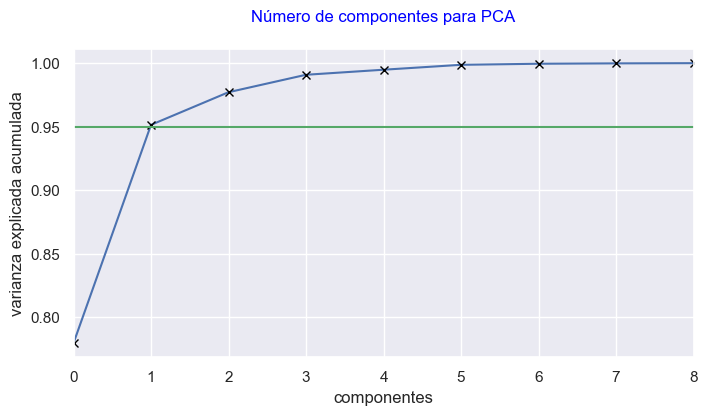

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Instanciamos el objeto y lo entrenamos con el dataframe para encontrar el número de componentes
df_pca = PCA().fit(df_scaled.select_dtypes(include=['float']))
plt.figure(figsize = (8, 4))
plt.plot(np.cumsum(df_pca.explained_variance_ratio_), marker = "x", markersize=6, markeredgecolor='black')
plt.axhline(0.95, color = "g", linestyle = "-")
plt.xlim([0, 8])
plt.xlabel("componentes")
plt.ylabel("varianza explicada acumulada");
plt.title("Número de componentes para PCA", fontsize=12, pad=20, color='blue')
plt.show()

El gráfico de codo proporcionado en el análisis de PCA sugiere que el segundo componente principal es el punto óptimo para la reducción de la dimensionalidad, ya que tenemos más del 95% de la varianza total en los datos, que es el valor estandar.

In [18]:
# Aplicamos PCA con 2 componentes
import pandas as pd
from sklearn.decomposition import PCA

# aplicaremos pca solo a las columnas numéricas
pca = PCA(n_components=2)  # o un número específico de componentes, e.g., n_components=2
df_numeric_pca = pca.fit_transform(df_scaled[numeric_columns])

# Ahora, convertimos los componentes principales en un DataFrame
df_numeric_pca = pd.DataFrame(df_numeric_pca, columns=[f'PC{i+1}' for i in range(df_numeric_pca.shape[1])])

# Concatenamos los componentes principales con las variables dummy del DataFrame original
# las variables dummy están en 'df_scaled' y no están en 'numeric_columns'
df_final = pd.concat([df_numeric_pca, df_scaled.drop(columns=numeric_columns)], axis=1)

df_final.head(10)

,PC1,PC2,status_type_link,status_type_photo,status_type_status,status_type_video
0,49.100899,37.986504,0,0,0,1
1,-14.524302,-2.018633,0,1,0,0
2,3.548360,3.339888,0,0,0,1
3,-14.528405,-2.024973,0,1,0,0
4,-13.892580,-1.191117,0,1,0,0
5,-13.913398,-1.572789,0,1,0,0
6,22.337336,1.191538,0,0,0,1
7,10.882812,-2.447377,0,0,0,1
8,-14.138424,-1.584132,0,1,0,0
9,-13.863593,-1.822525,0,1,0,0


#### Modelado con K-Means

Antes de aplicar el modelado con K-Means, vamos a aplicar el metodo del codo para determinar el número ótimo de clusters que se deben utilizar en el K-Means. El método del codo se enfoca en la distancia promedio entre las observaciones y su centroide, prestando atención a las distancias dentro de cada clúster. A medida que aumenta el número de clústeres (k), la variabilidad dentro de cada clúster tiende a reducirse. Es preferible tener distancias intra-cluster más cortas, ya que esto indica clústeres más densos y bien definidos. Este método busca determinar el número óptimo de clústeres (k) donde aumentar k no resulta en mejoras significativas en la distancia promedio dentro de los clústeres.


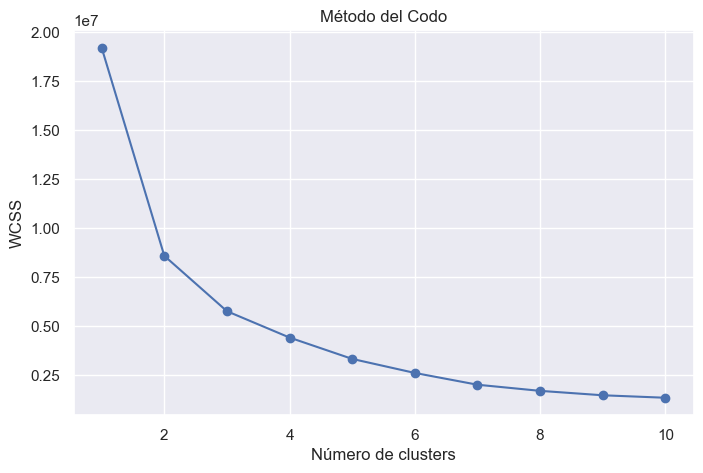

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = [] #sum of squares within the cluster
for i in range(1, 11):  #probaremos de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)

# Ahora graficamos los resultados
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Suma de cuadrados dentro del cluster
plt.show()


En el gráfico, hay una disminución rápida de WCSS desde 1 hasta 4 clústeres, y luego el cambio en WCSS se vuelve menos pronunciado. Parece que el "codo" del gráfico, o el punto donde la disminución de la inercia comienza a aplanarse, podría estar alrededor de 4 clústeres. Esto sugiere que el número óptimo de clústeres para este conjunto de datos sería 4, ya que añadir más clústeres más allá de este punto no proporciona un beneficio significativo en términos de disminución de WCSS.

In [20]:
from sklearn.metrics import silhouette_score

# Calculamos los puntajes de silueta para diferentes números de clústeres
silhouette_scores = {}
for k in range(2, 11):  # Probar desde 2 hasta 10 clústeres
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final)
    score = silhouette_score(df_final, kmeans.labels_)
    silhouette_scores[k] = score

# Encontramos el número de clústeres con el puntaje de silueta más alto
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
optimal_score = silhouette_scores[optimal_k]

optimal_k, optimal_score
print(f"El número óptimo de clusters es: {optimal_k, optimal_score}")


El número óptimo de clusters es: (2, 0.9006873137490959)


 Aunque el puntaje de silueta favorece 2 clústeres, vamos a elegir comenzar con 4 clústeres dados por el método del codo y evaluar la calidad y utilidad de los clústeres resultantes. Si los clústeres con cuatro parecen poco diferenciados o no aportan información adicional,se considerá reducir a dos. 

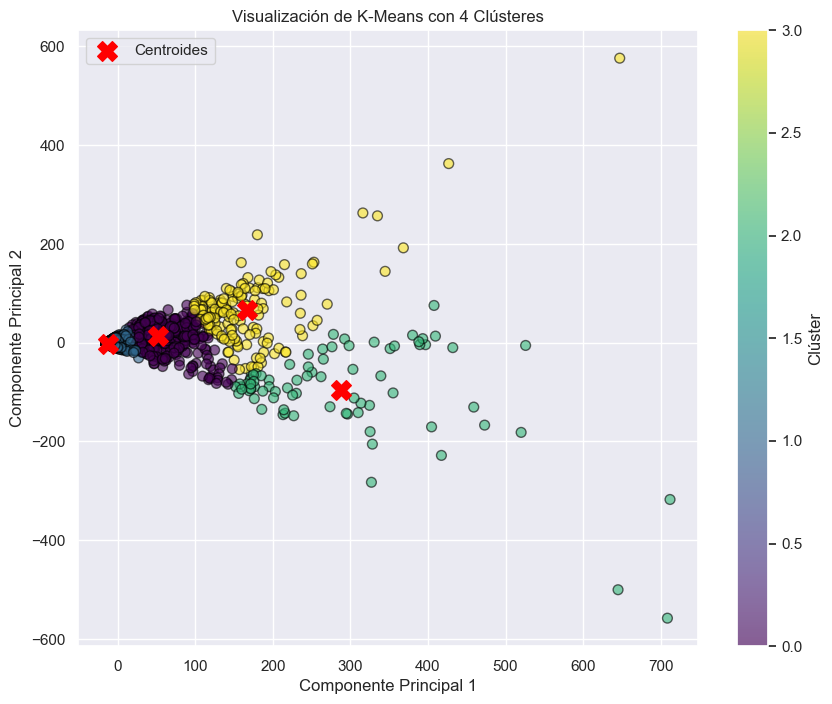

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Entrenamos K-means con 4 clústeres
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_final)

# Creamos la visualización usando las dos primeras componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(df_final['PC1'], df_final['PC2'], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.title('Visualización de K-Means con 4 Clústeres')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clúster')

# Opcional: Centroides de los clústeres
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.legend()
plt.show()


El gráfico muestra publicaciones de Facebook sobre Tailandia agrupadas en 4 clústeres mediante K-means después de aplicar PCA, con puntos coloreados por clúster y centroides marcados con cruces rojas. Los clústeres tienen distribuciones distintas, lo que implica que PCA y K-means han diferenciado eficazmente los grupos. Aunque hay una clara separación entre algunos clústeres, otros están más cercanos, sugiriendo que ciertas categorías de publicaciones se distinguen mejor que otras. La presencia de outliers podría indicar publicaciones atípicas. La interpretación depende de cómo las variables originales contribuyen a las dos principales componentes, y la utilidad del modelo se basará en si los clústeres reflejan categorías específicas de publicaciones.

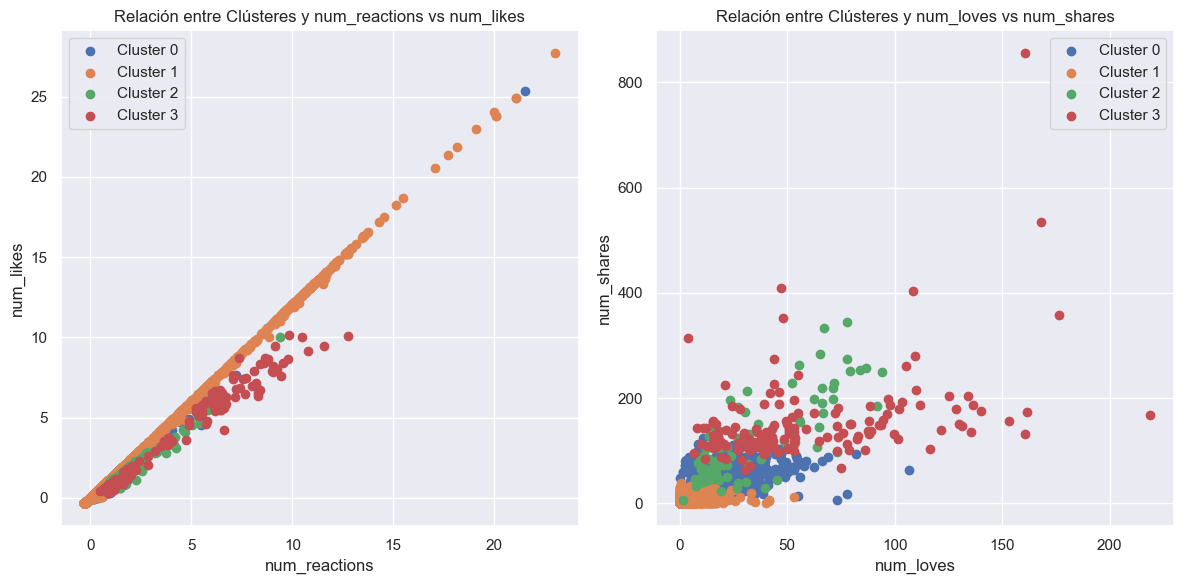

In [40]:
# Vamos a ver la relación entre los clusters obtenidos con Kmeans y las variables con mayor correlación

import matplotlib.pyplot as plt
df_scaled['Cluster'] = clusters

# Primer gráfico: num_reactions vs num_likes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
for cluster in range(kmeans.n_clusters):
    cluster_points =df_scaled[df_scaled['Cluster'] == cluster]
    plt.scatter(cluster_points['num_reactions'], cluster_points['num_likes'], label=f'Cluster {cluster}')
plt.title('Relación entre Clústeres y num_reactions vs num_likes')
plt.xlabel('num_reactions')
plt.ylabel('num_likes')
plt.legend()

# Segundo gráfico: num_loves vs num_shares
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
for cluster in range(kmeans.n_clusters):
    cluster_points = df_scaled[df_scaled['Cluster'] == cluster]
    plt.scatter(cluster_points['num_loves'], cluster_points['num_shares'], label=f'Cluster {cluster}')
plt.title('Relación entre Clústeres y num_loves vs num_shares')
plt.xlabel('num_loves')
plt.ylabel('num_shares')
plt.legend()

plt.tight_layout()
plt.show()



El gráfico muestra dos gráficos de dispersión de las variables más correlacionadas en un conjunto de datos de Facebook sobre Tailandia, clasificado en 4 clústeres por K-means. 'num_reactions' y 'num_likes' exhiben una fuerte correlación lineal, indicando que los clústeres varían más por volumen que por tipo de publicación, dado que no hay una separación clara entre ellos. En contraste, 'num_loves' y 'num_shares' tienen una relación menos directa, con una dispersión más amplia y clústeres mejor diferenciados, lo que podría señalar una distinción más clara en el tipo de contenido o nivel de interacción. Aunque los clústeres reflejan diferentes grados de compromiso, la superposición sugiere la necesidad de más variables para una diferenciación más nítida entre los tipos de publicaciones.

### Ejercicio 2: Clasifica los distintos registros utilizando el algoritmo de clustering jerárquico.

La agrupación jerárquica es un método de aprendizaje no supervisado que organiza objetos similares en grupos, formando una jerarquía. Este proceso comienza tratando cada punto de datos como un grupo independiente y luego los fusiona iterativamente en función de su similitud, resultando en un dendrograma. Este dendrograma ilustra la jerarquía y las relaciones entre los clústeres. La visualización de estos conglomerados en diferentes niveles facilita la identificación de patrones y anomalías en los datos, haciendo de la agrupación jerárquica una herramienta valiosa para el análisis exploratorio de datos. No necesita que predefinamos el número de clústers previamente.

Hay dos tipos de enfoque en el clustering jerárqueico: aglomerativo y divisivo, usaremos el primero. Se comienza con cada dato como un cluster individual y se van uniendo los más similares en clusters mayores hasta alcanzar un único cluster. Es el enfoque más común

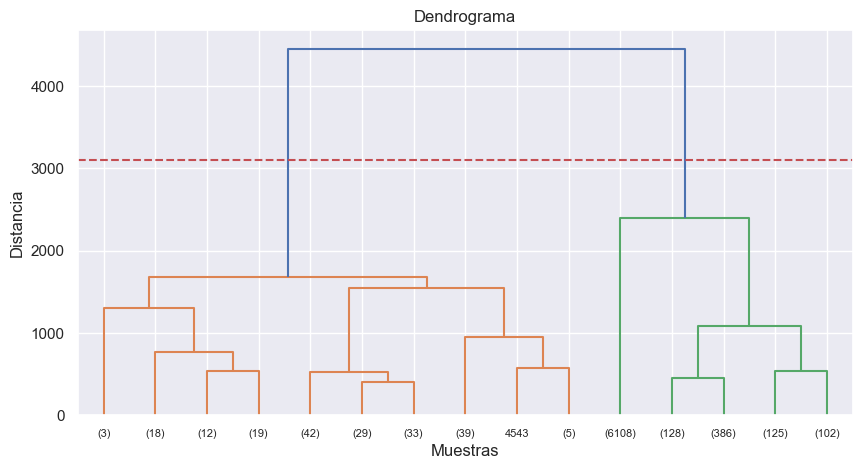

Número clusters: 2


In [41]:
# Calculamos la distancia entre los clusters mediante el método de enlace 'ward'
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

Z = linkage(df_final.values, method='ward')
plt.figure(figsize=(10, 5))
#Creamos el dendrograma
dendrogram(Z,leaf_font_size=8,truncate_mode='lastp', p=15)
# Determinamos el punto de corte deseado
max_d = 3100 
# creamos los clusters
clusters = fcluster(Z, max_d, criterion='distance')

plt.axhline(y=max_d, color='r', linestyle='--')  # Línia horitzontal del punt de tall
plt.title('Dendrograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

num_clusters = len(set(clusters))
print("Número clusters:", num_clusters)

In [42]:
#Aplicamos el número de clusters que nos indico el dendograma
from sklearn.cluster import AgglomerativeClustering

# creamos el modelo
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# Ajustamos el modelp
agg_cluster.fit(df_final)

AgglomerativeClustering(affinity='euclidean')

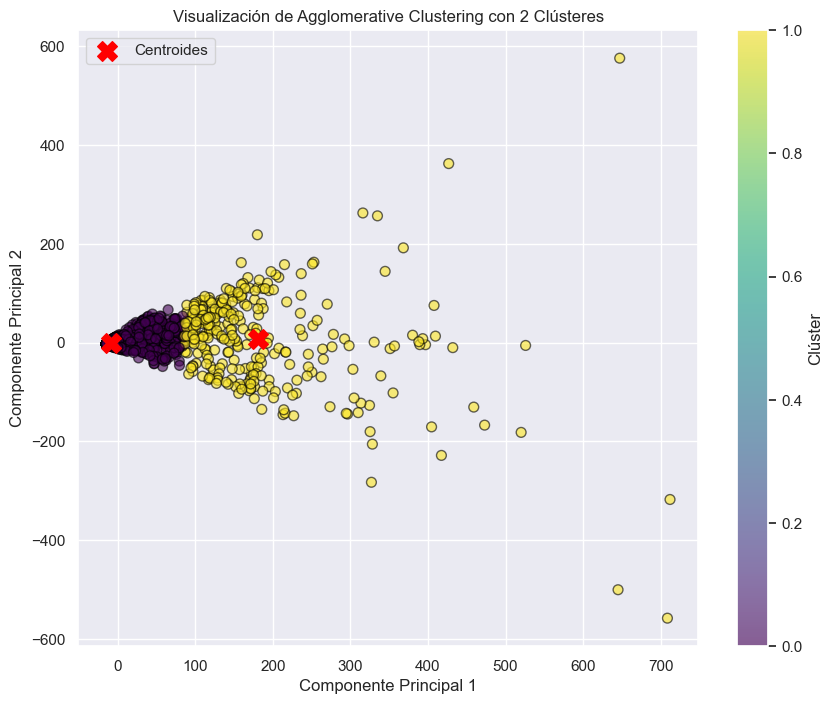

In [43]:
# Creamos el gráfico de dispersión para visualizar el algoritmo de clustering jerárquico con 2 clusters
# Entrenamos K-means con 4 clústeres
agg_cluster = KMeans(n_clusters=2, random_state=42)
clusters = agg_cluster.fit_predict(df_final)

# Creamos la visualización usando las dos primeras componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(df_final['PC1'], df_final['PC2'], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.title('Visualización de Agglomerative Clustering con 2 Clústeres')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clúster')

# Opcional: Centroides de los clústeres
centroids = agg_cluster.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.legend()
plt.show()


 Parece haber una distinta separación entre los dos clústeres, lo que sugiere que el algoritmo ha identificado dos grupos bien diferenciados dentro de los datos.

 Uno de los clústeres parece ser más denso que el otro, lo que indica que hay más publicaciones que son similares entre sí en este grupo.

Los centroides parecen estar bien posicionados en el centro de sus respectivos clústeres, lo que indica una buena clasificación por parte del algoritmo.

El clúster representado por los puntos morados está más concentrado, mientras que el clúster de los puntos amarillos está más disperso. Esto podría indicar que las publicaciones en el clúster morado son más homogéneas o similares en sus características que las del clúster amarillo.


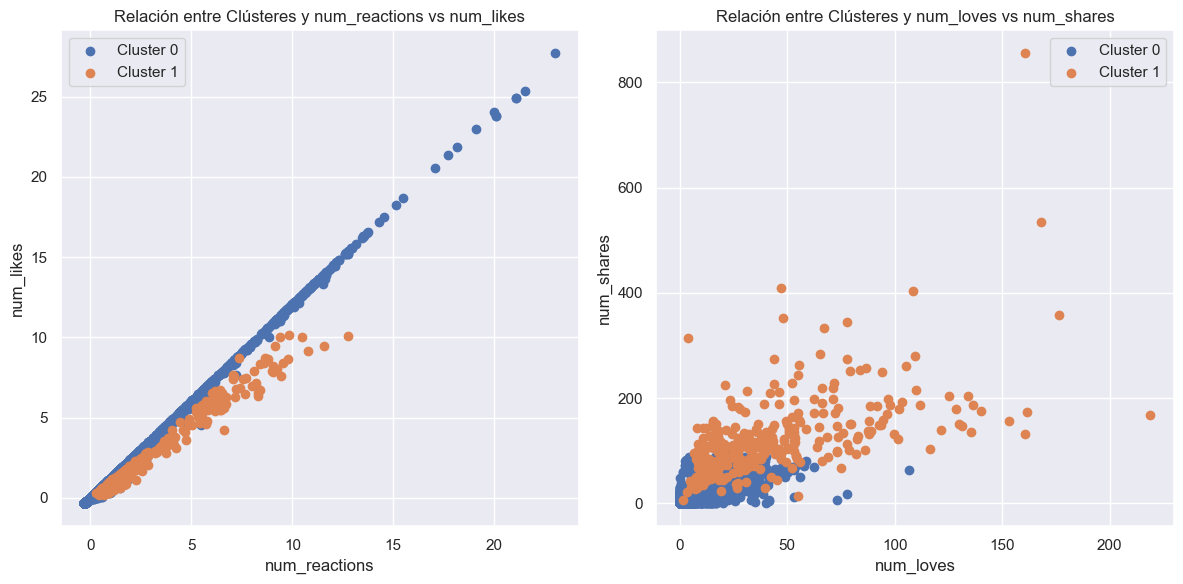

In [44]:
#Creamos un gráfico para ver la relación entre los clusters obtenidos con AgglomerativeClustering y las variables con mayor correlación

import matplotlib.pyplot as plt
df_scaled['Cluster'] = clusters

# Primer gráfico: num_reactions vs num_likes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
for cluster in range(agg_cluster.n_clusters):
    cluster_points =df_scaled[df_scaled['Cluster'] == cluster]
    plt.scatter(cluster_points['num_reactions'], cluster_points['num_likes'], label=f'Cluster {cluster}')
plt.title('Relación entre Clústeres y num_reactions vs num_likes')
plt.xlabel('num_reactions')
plt.ylabel('num_likes')
plt.legend()

# Segundo gráfico: num_loves vs num_shares
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
for cluster in range(agg_cluster.n_clusters):
    cluster_points = df_scaled[df_scaled['Cluster'] == cluster]
    plt.scatter(cluster_points['num_loves'], cluster_points['num_shares'], label=f'Cluster {cluster}')
plt.title('Relación entre Clústeres y num_loves vs num_shares')
plt.xlabel('num_loves')
plt.ylabel('num_shares')
plt.legend()

plt.tight_layout()
plt.show()

 El algoritmo ha identificado clústeres que reflejan una fuerte correlación lineal entre algunas de las variables (reacciones y "likes"). Esto sugiere que es efectivo en agrupar publicaciones con patrones similares de interacción.

 En el primer gráfico, los clústeres se distinguen claramente, lo que implica una clasificación efectiva. En el segundo gráfico, aunque hay una distinción, hay más superposición, lo que puede sugerir que las variables "loves" y "shares" no son tan discriminativas para la clasificación o que la relación entre ellas es más compleja.

 El algoritmo parece manejar bien los datos con una fuerte correlación lineal, pero puede tener dificultades con datos que tienen una relación menos definida.

 La eficacia del algoritmo para clasificar las publicaciones parece depender de las variables en consideración. Para "reactions" y "likes", el algoritmo parece ser muy efectivo, mientras que para "loves" y "shares", la eficacia podría no ser tan alta debido a la mayor variabilidad en la relación entre estas variables.

### Ejercicio 3: Calcula el rendimiento del clustering mediante un parámetro como puede ser silueta.

Vamos a utilizar la función silhouette_score de la biblioteca sklearn.metrics para calcular la puntuación de silueta para dos métodos de clustering diferentes: K-means y Clustering Jerárquico Aglomerativo 

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

#calcula la puntuación de silueta para los clústeres identificados por el algoritmo K-means.
labels = kmeans.labels_
Kmeans_silhouette = silhouette_score(df_final, labels)
#calcula la puntuación de silueta para los clústeres identificados por elClustering Jerárquico Aglomerativo.
labels = agg_cluster.labels_
Hclustering_silhouette = silhouette_score(df_final, labels)
#resultados
print("Resultado silhouette Kmeans:", Kmeans_silhouette.round(5)*100)
print("Resultado silhouette Hclustering:", Hclustering_silhouette.round(5)*100)

Resultado silhouette Kmeans: 86.41
Resultado silhouette Hclustering: 90.069


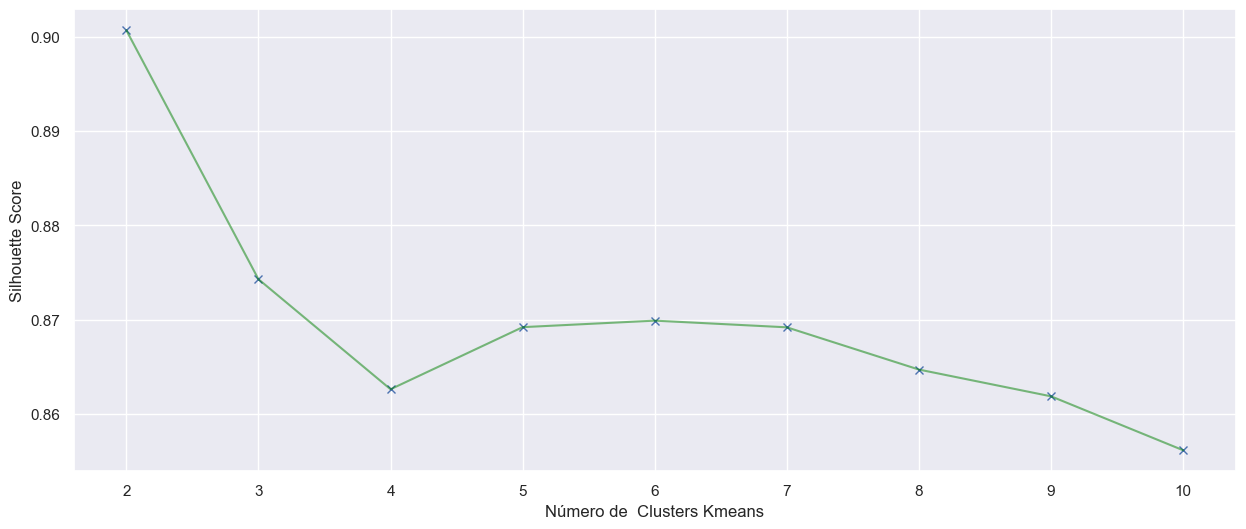

In [51]:
#Realizamos una gráfica que nos muestre el score para Kmeans 
ss_all = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 35))
    predict = km.fit_predict(df_final)
    score = silhouette_score(X = df_final, labels = predict)
    ss_all.append(score)
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2, 11) , ss_all , 'x')
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'green')
plt.xlabel('Número de  Clusters Kmeans') , plt.ylabel('Silhouette Score')
plt.show()

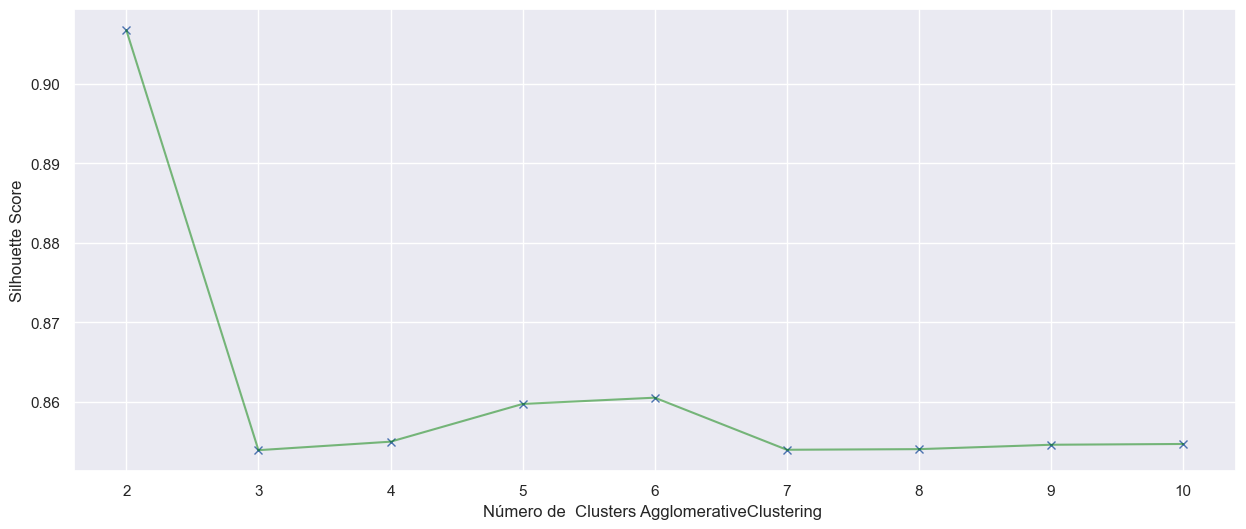

In [52]:
#Realizamos una gráfica que nos muestre el score para AgglomerativeClustering
ss_all = []
for n in range(2, 11):
    ac = (AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward'))
    predict = ac.fit_predict(df_final)
    score = silhouette_score(X = df_final, labels = predict)
    ss_all.append(score)
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'x')
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'green')
plt.xlabel('Número de  Clusters AgglomerativeClustering ') , plt.ylabel('Silhouette Score')
plt.show()

Las puntuaciones de silueta indican que tanto K-means como el Clustering Jerárquico han clasificado efectivamente los datos de Facebook sobre Tailandia. Con puntuaciones de 86.41 y 90.069 respectivamente, el Clustering Jerárquico se muestra ligeramente superior. La puntuación de silueta evalúa la cohesión y separación de los clústeres. Aunque el Clustering Jerárquico es preferible según estos resultados, la elección final debe considerar también el conocimiento del dominio y la utilidad de los insights obtenidos.